# Lab 4: Regularization

## 4.1. Regularization

#### Deep neural networks and overfitting

* Deep neural networks are usually complex models due to their large number of parameters and sophisticated architecture, thus prone to being over-parameterized and overfitting.

> __Overfitting__ occurs when a model fits the training data so well that it has lost its ability to generalize and its predictions are not correct for new cases.

* An overly complex model may learn and understand the underlying patterns of the training data very well, but at the same time unconsciously become sensitive to the noises in the training data, resulting in overfitting and not generalizing to the test data.
<!-- * Since the actual level of complexity is unknown to us in advance, it is often impossible to jump to the right amount of model complexity during the training stage.
* One of the remedies is to *regularize* the process before or during model training. -->

#### Bias and Variance

> __Bias__ refers to how close the model prediction is to the target value, on 
average.
> 
> __Variance__ measures the variability of the model prediction.

* __Bias-variance trade-off__
    - A model with a high bias means it fails to capture the underlying pattern in the data and 
only generates a biased, off-target prediction, i.e. underfitting.
    - A model with high variance often results from too much focus on fitting the training data 
well, even to the point of exactly matching its predictions to the target labels, i.e. overfitting.
    - Generally, as we lower the bias, the variance increases. 
    - So the ideal is to find that middle point where we get a trade-off between bias and 
variance, and both values are low. 
    - To find this equilibrium point, a common strategy is to visualize the error during training 
and the error with the validation or test data.

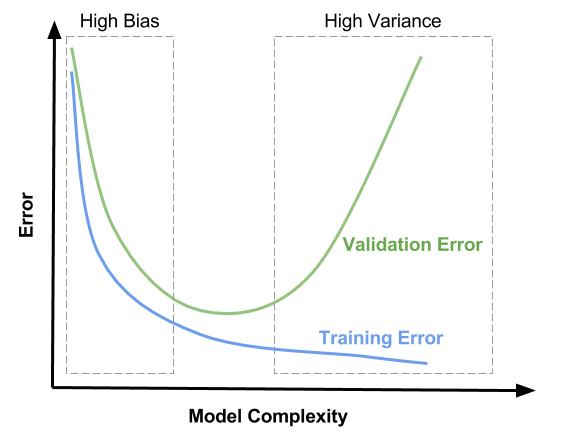

#### Regularization

> __Regularization__ is a suite of strategies used to reduce the generalization error of machine learning models, in particular deep learning models.

* Regularization techniques are, therefore, a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation. 
* This is called “regularizing” the model, because it tends to make the model simpler, more “regular” its curve smoother, more “generic”; thus it is less specific to the training set and better able to generalize. <!--- by more closely approximating the latent manifold of the data. --->
* An adequate regularization could help control the complexity of a neural network, reduce the generalization gap and address the issue of overfitting, while at the same time keeping the training error as low as possible. 

#### Model training process

* A typical model training process is composed of:
    - __Training data__. In supervised learning tasks, the training data consists of input-output pairs.
    - __Model__. A trained model consists of two parts: parameters and architecture. Parameters are the integral components of a model, and the architecture specifies how these components interact with the input data to produce the final prediction output
    - __Cost__. This predicted value is then compared with the ground truth's target output to produce an error metric jointly. Here, the error indicates the current cost on how close or far away it is between the prediction and the actual value.
    - __Optimization__. Following a particular optimization procedure, the training process adjusts the model parameters and sometimes the architecture to reduce the training cost.

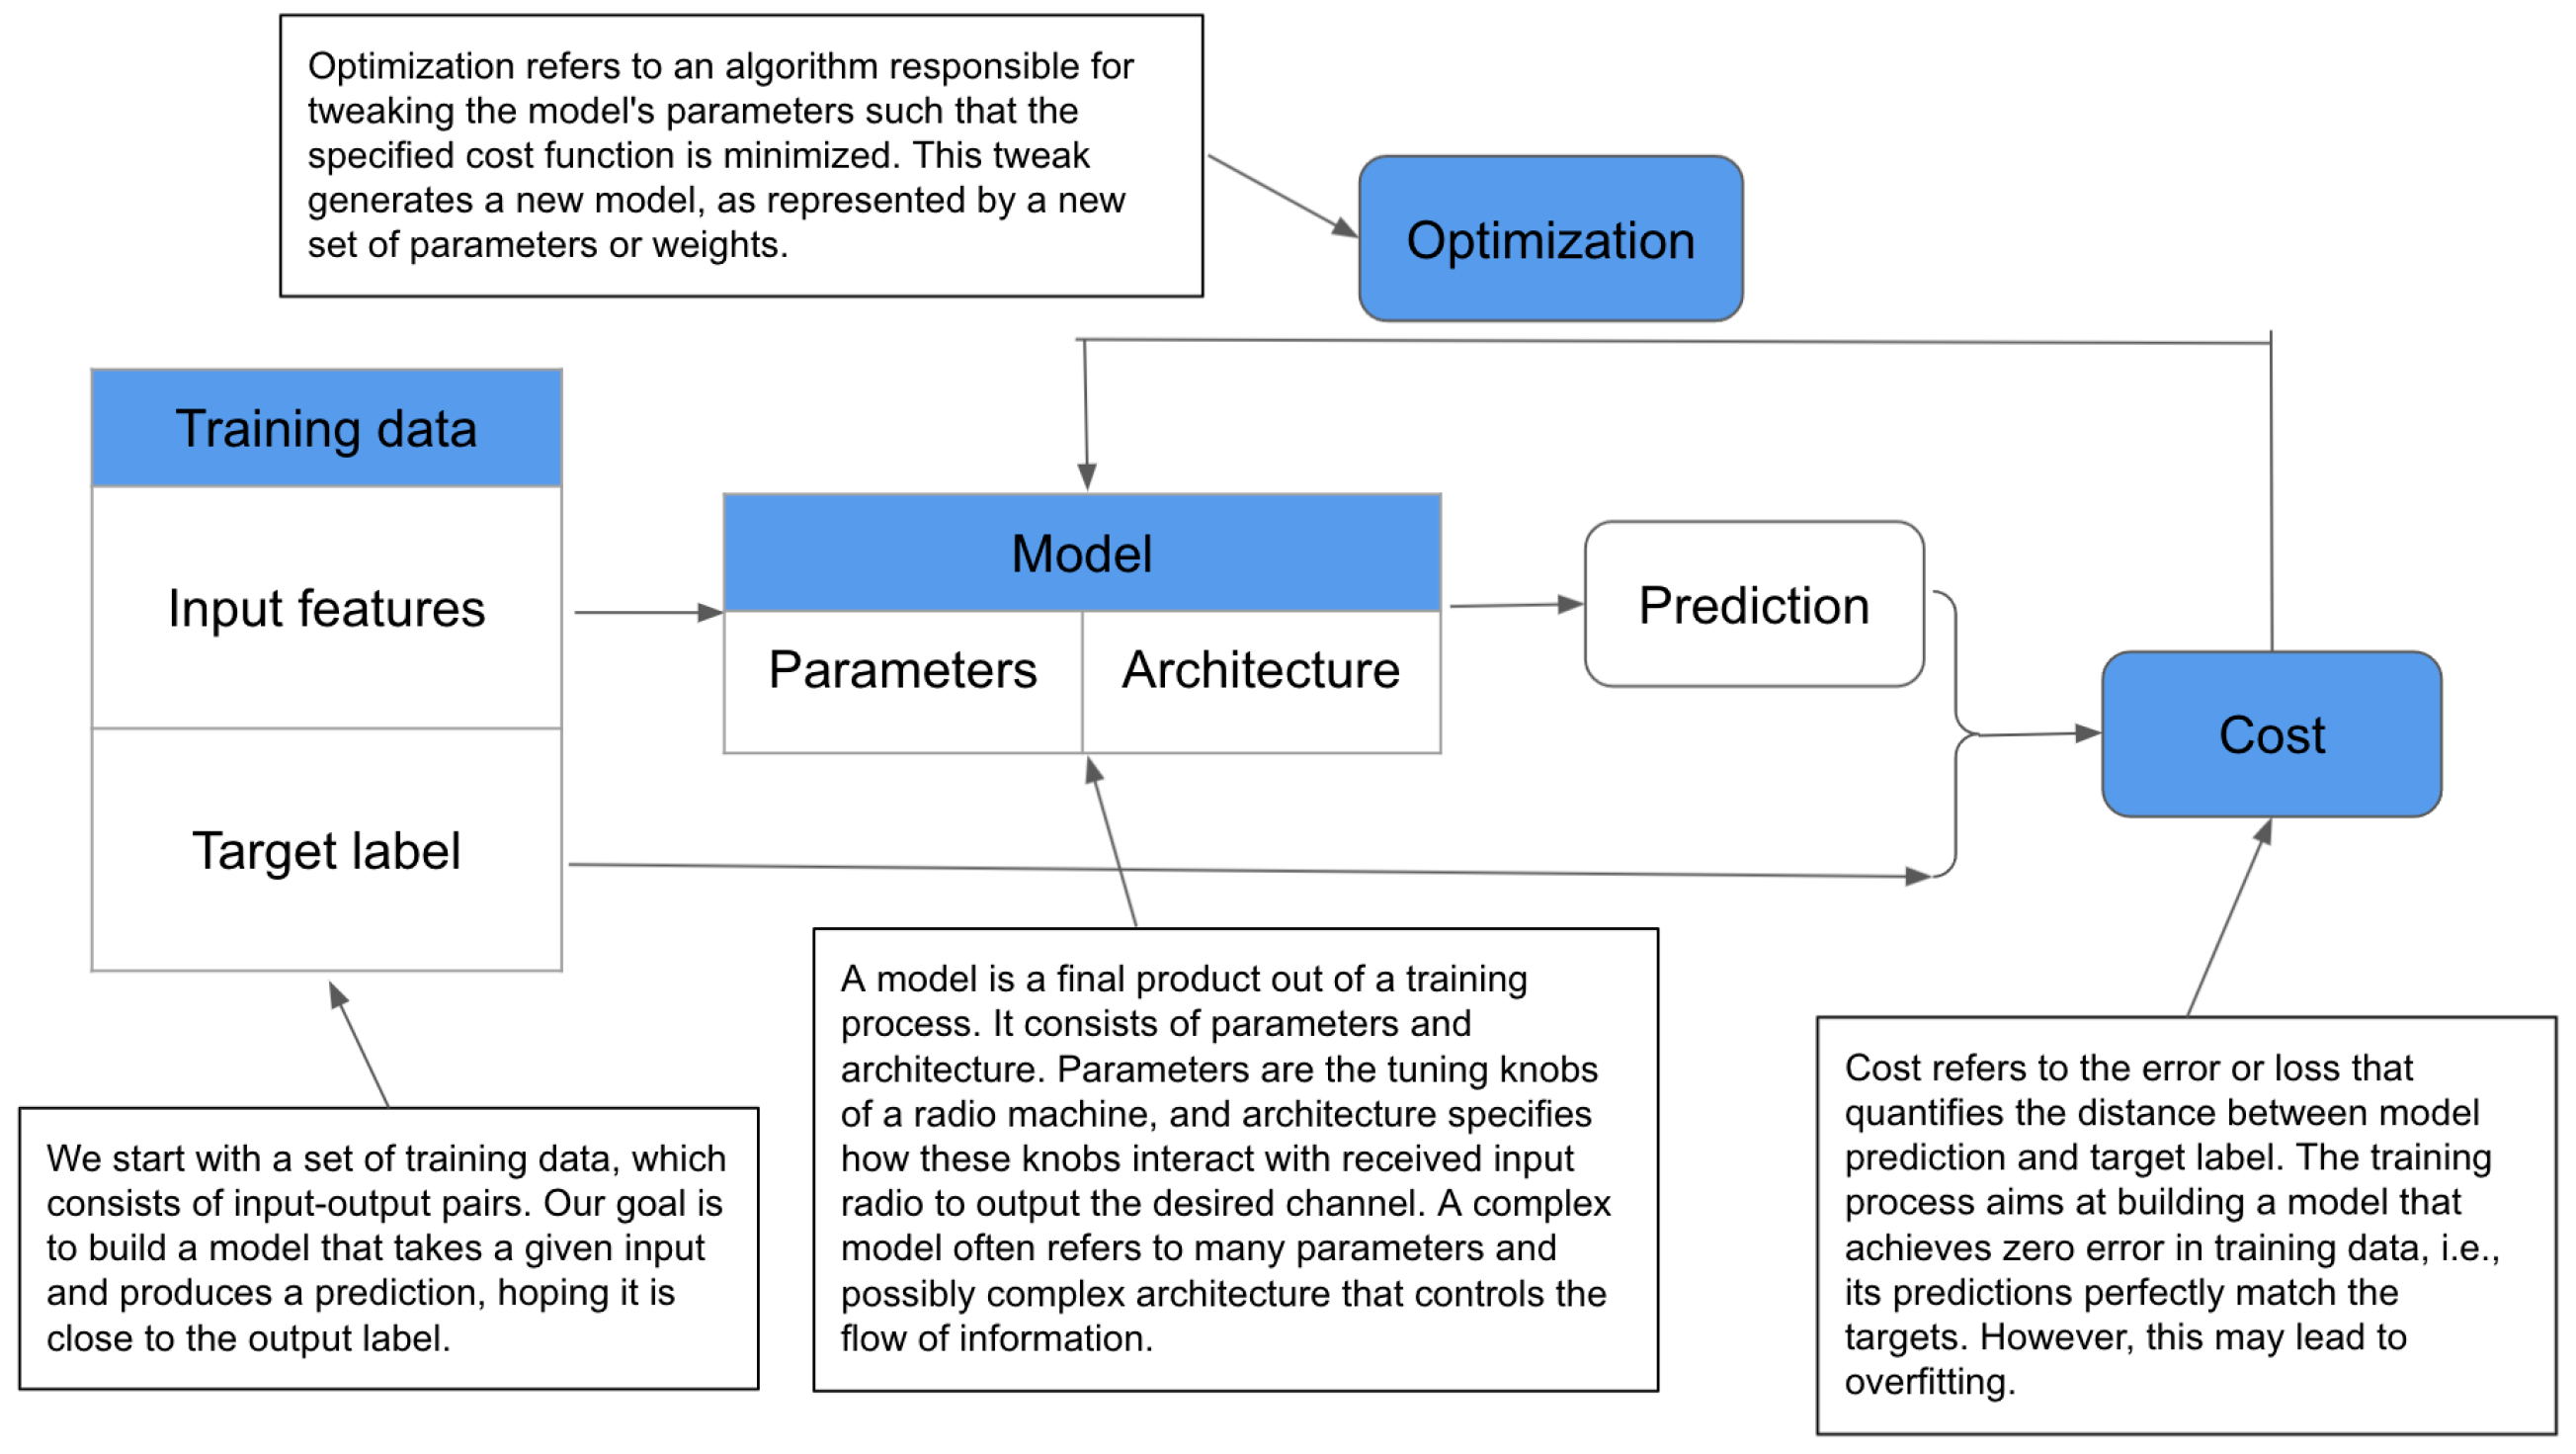

#### Common regularization techniques.

* It typically works by tweaking either data, model architecture, cost function, or optimization procedure to enhance the overall learning algorithm and control the degree of overfitting.

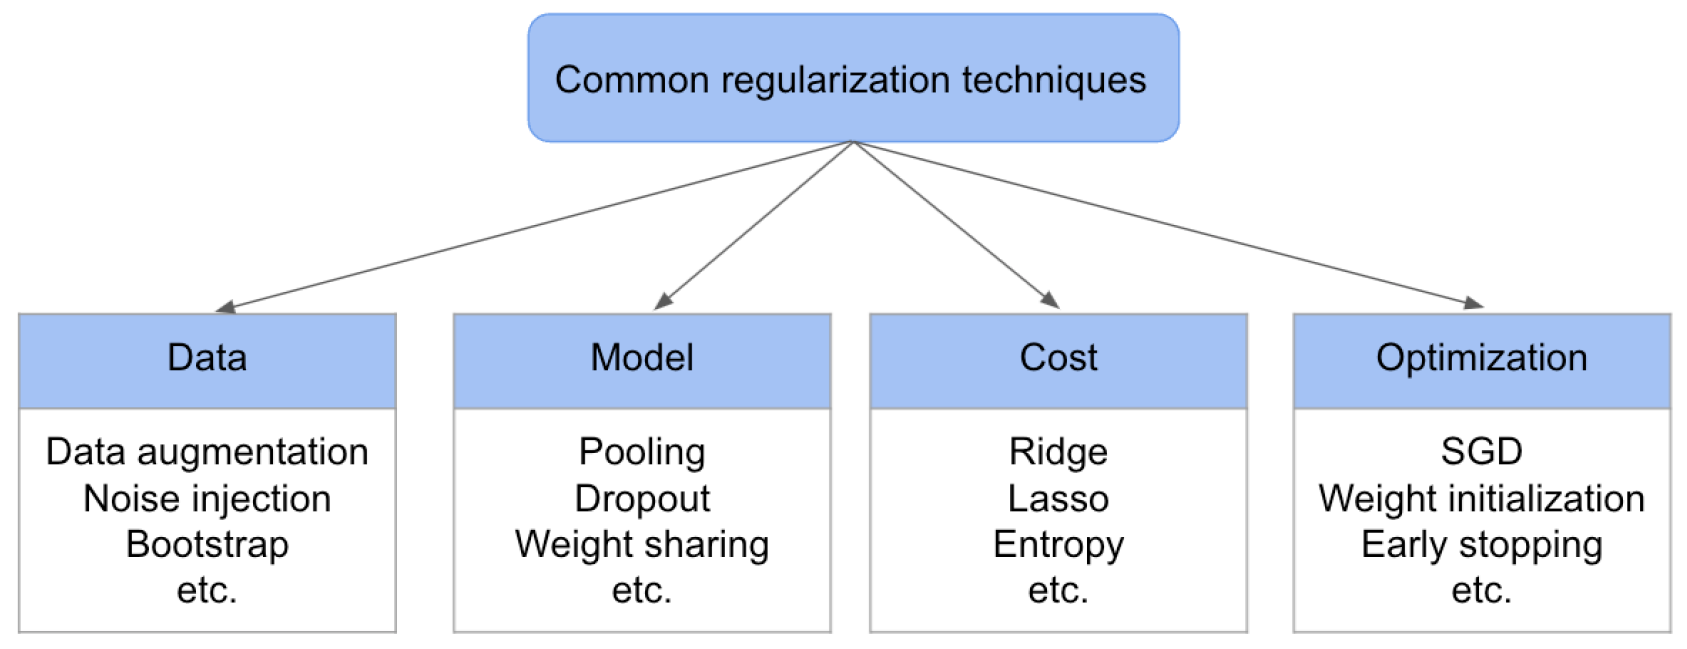

## 4.2 The IMDB example

* The IMDB (Internet Movie Data Base) dataset is a set of reviews on different movies collected from the popular internet site.
* There are 25,000 reviews of which half will be used for training and half for testing. Both halves are composed of 50% positive reviews and 50% negative reviews.
* The data consists of a set of words (the criticism itself), coded as integers (each different word is assigned a number) and a label indicating whether the criticism is positive or negative.
* The data is included in Keras so it is easy to load and use.

### 4.2.1. Downloading the dataset

In [1]:
import keras
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 

* The parameter `num_words = 10000` indicates that we will keep the 10,000 most frequent words used in the training set, the rest will be ignored. This allows the data to have a more manageable size.
* Each entry in the training set is a list of integers representing the words available in the critique.

In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


* Each case is labeled as a zero or a one indicating a negative or positive criticism respectively.

In [3]:
train_labels[0]

1

* Because we’re restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000.

In [4]:
max([max(sequence) for sequence in train_data])

9999

* We can take a look at the original review with this little code that converts the numerical indexes back into words (assigning `?` to the word we have not considered because it is not among the 10.000 most common.

In [5]:
# word_index is a dictionary mapping words to integer index
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decodes de review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved 
# indices por "padding", "start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 4.2.2. IMDB: Preparing the data

__multi-hot encoding__ 

* In order to feed the neural network we need to convert the list of integers into a more manageable representation.
* As each review will be composed of words whose indexes range from zero to 9,999, it is easiest to encode our review as an array of 10,000 positions (from 0 to 9,999). In each position there will be a 1 if the word is present in the critique or a zero otherwise.
* This is called a _multi-hot encoding_.
* For example, a criticism that is the sequence of only two words `[3, 5]` will be encoded as an array of 10 000 positions in which only positions `3` and `5` store a one, the rest will be zeros. 
* The 1s and 0s are represented as floating values since neural networks are fed with floating values (for various reasons, including efficiency in making the various calculations).

__Implementing multi-hot encoding__
* In Keras we have a preprocessing layer (`CategoryEncoding`) which encodes integer features.
* See: https://keras.io/api/layers/preprocessing_layers/categorical/category_encoding
* This layer provides options for condensing data into a categorical encoding when the total number of tokens are known in advance. It accepts integer values as inputs, and it outputs a dense or sparse representation of those inputs. 
* But we can also define manually a very easy `multi_hot_encode()` function.

In [7]:
import numpy as np
def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i, sequence] = 1.
    return results

* Let us now apply the `multi_hot_encode` function to our training and test data.

In [8]:
# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)

# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


* The labels must also be converted to `np.array` but in this case the conversion is simple.
* As we can see, the ones and zeros of the labels are also converted to float values.

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 4.2.3. IMDB: Building the neural network

__Input layer__
* We will build the network using a sequential Keras model composed of a sequence of densely connected layers (all neurons in one layer connected to all neurons in the next).
* We will have an input layer with 10,000 entries (one for each possible word).

__Hidden layers__
* There are two key architecture decisions to be made about such a stack of Dense layers:
    1. How many layers to use.
    2. How many units to choose for each layer.
* A large network has a bigger representational power but it is more prone to overfitting.
* Unfortunately, there is no magical formula to determine the right number of layers or the right size for each layer. 
* The general workflow for finding an appropriate model size is to start with relatively few layers and parameters, and increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss.
* We decided to include two hidden layers with 16 neurons each with a `relu` activation function.

__Output layer__
* Finally we will have an output layer with a single neuron. The activation of this neuron will be a `sigmoid` function that offers values between zero and one that indicate the probability that the case studied is a zero (negative review) or a one (positive review). 

In [10]:
import keras
from keras import layers

# we are using the name parameter to identify better model and layers
model = keras.Sequential(name='imdb')

# we create the layers of the model 
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, name='hidden_1', activation='relu'))
model.add(layers.Dense(16, name='hidden_2',activation='relu'))
model.add(layers.Dense(1, name='output',  activation='sigmoid'))

model.summary()

Model: "imdb"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

* After creating the network structure we have to indicate the learning parameters that we are going to use.
* First of all we have to indicate an error function. 
* As we are working with a model where the final output is a probability the most appropriate function is `binary_crossentropy`.
* We could also have applied `mean_squared_error` but as a general rule `binary_crossentropy` works better with outputs that represent probabilities.
* As an optimizing algorithm we will use `adam`.
* As a validation measure in our test suite we will use `accuracy`.

In [11]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### 4.2.4.	Training, validation and test sets

#### Training, validation and test sets

> __Training set__: Used for training the model, i.e. find the optimal values for the parameter of the model (the _weights_ and the _biases_).
>
> __Validation set__: Used for tunning the hyperparameters, i.e. other parameters used in training process (number of epochs, batch size, number of layers, number of neurons, learning rate, etc.)
>
> __Test set__: Used to obtain a final performance estimate.

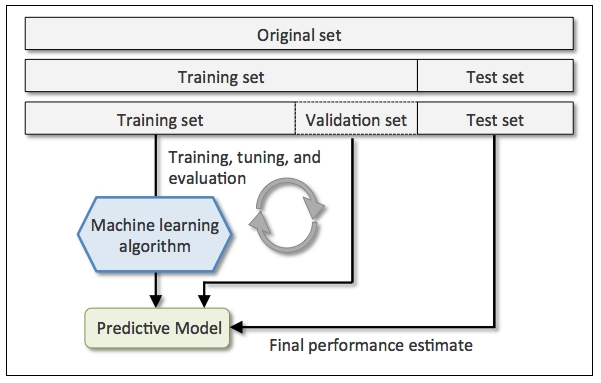

#### IMDB with training, validation and test sets

* To monitor the accuracy of the model during training on data that you have not seen before we will divide our training set (`x_train`) into two parts:
    * `x_val` : will be the first 10,000 values of the training set and `y_val` will be their corresponding labels, i.e., the validation set.
    * `partial_x_train` : will be the remaining 15,000 values and `partial_y_train` will be their corresponding labels, i.e., the new training set.

In [12]:
x_val = x_train[:10000] # Copy of x_train from the begining (0) to 9999
partial_x_train = x_train[10000:] # Copy of x_train from 10000 to the end

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

* Now we train the model using `partial_x_train` and `partial_y_train` as training data.
* We repeat the training with these data 20 times (`epoch`).
* The calculations with the loss function and the update of weights is done every 512 cases (`batch_size`).
* Finally the validation data are `x_val` and `y_val` and are passed to the `fit` method using the `validation_data` parameter.


In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6869 - loss: 0.6332 - val_accuracy: 0.8543 - val_loss: 0.4372
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8878 - loss: 0.3713 - val_accuracy: 0.8822 - val_loss: 0.3196
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9236 - loss: 0.2452 - val_accuracy: 0.8898 - val_loss: 0.2831
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9467 - loss: 0.1796 - val_accuracy: 0.8899 - val_loss: 0.2762
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9589 - loss: 0.1439 - val_accuracy: 0.8875 - val_loss: 0.2821
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9703 - loss: 0.1158 - val_accuracy: 0.8852 - val_loss: 0.2933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9780 - loss: 0.0917 - val_accuracy: 0.8838 - val_loss: 0.3102
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9851 - loss: 0.0740 - val_accuracy: 0.8821 - val_loss

* We can use the `validation_split` parameter of the `fit` method for automatically divide the train test into train and validation
* The value passed is the percentage of training data reserved for validation.
* In this example, 20% of the samples in the x_train and y_train arrays are being held out from training and used as validation data.
  
~~~
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.2)
~~~

* The `fit` method returns a `History` object. 
* This object has a `history` property which is a dictionary containing the data of everything that has happened during the training.
* It has four keys: `loss`, `accuracy`, `val_loss`, `val_accuracy`. 
* For each of these keys it has a list of the different values that the parameter has been taking during the training.

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
history_dict['loss']

[0.5715230107307434,
 0.3409089744091034,
 0.2366717904806137,
 0.18058906495571136,
 0.1422148048877716,
 0.11445795744657516,
 0.09165249764919281,
 0.07384999096393585,
 0.059105291962623596,
 0.04723456874489784,
 0.037782419472932816,
 0.030041532590985298,
 0.024189312011003494,
 0.01940867491066456,
 0.015906529501080513,
 0.012966413982212543,
 0.010775734670460224,
 0.009195725433528423,
 0.007710651494562626,
 0.0065805744379758835]

* We are going to draw now on a graph how the `loss` and `val_loss` data have been varying during the training.
* On the X axis we will have the different *epochs* numbered starting at 1.
* We use the __Matplotlib__ library to draw the graph.

In [16]:
import matplotlib.pyplot as plt

def plot(train, validation, title):
    plt.clf()
    epochs = range(1, len(train) + 1)
    
    plt.plot(epochs, train, 'b-o', label='Training ' + title)
    plt.plot(epochs, validation, 'r--o', label='Validation '+ title) 

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

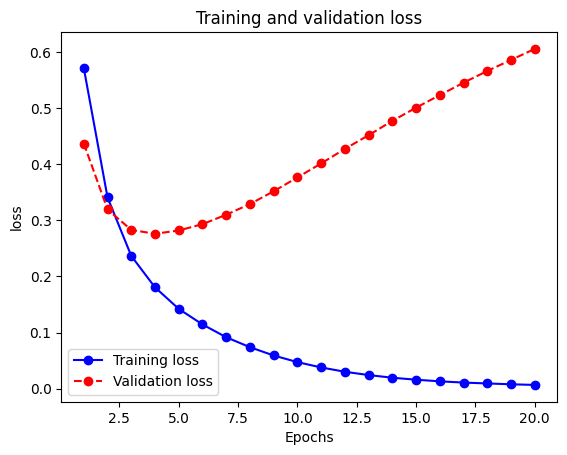

In [17]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')

* Now we represent the same thing but taking into account the values of accuracy

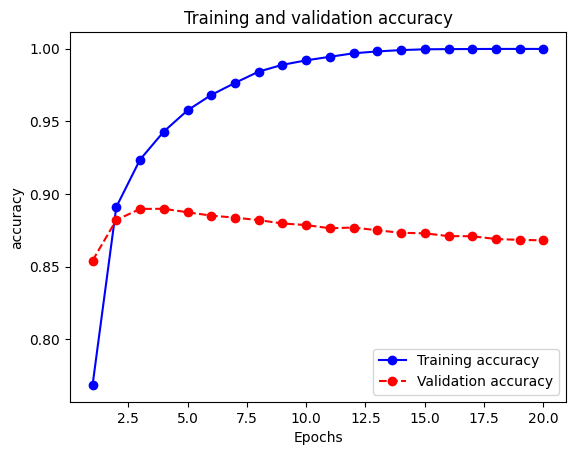

In [18]:
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

* As we can see during training the error is reduced and the accuracy of the model increases for the cases used in training.
* However, in the data we have set aside for validation we can see how we have a peak in accuracy at the third *epoch* but from there on the accuracy drops.
* What is happening is **overfitting**, the system is adapting too much to the training data, so it is not able to generalize with the validation data.

* We will evaluate the performance of the network using the test data `x_test` and `y_test`.

In [19]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8546 - loss: 0.6645
[0.6523457765579224, 0.8564800024032593]


* The first value corresponds to the loss, the second to the accuracy.

## 4.3. Early stopping

* In machine learning, early stopping is a form of regularization used to avoid overfitting.
* Early Stopping monitors the performance of the model for every epoch on a held-out validation set during the training, and terminate the training conditional on the validation performance.
* Basically we stop training as soon as the validation error reaches a minimum, or the validation accuracy doesn't improve over time.

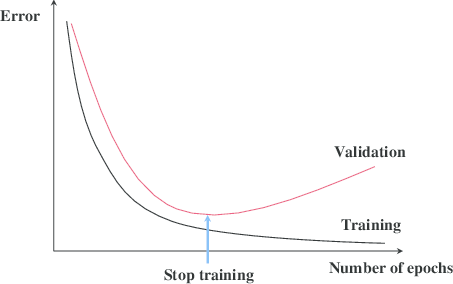

### 4.3.1. Keras callbacks and early stopping

* Early stopping can be automatically applied in Keras using the `early_stopping` callback.
* A __callback__ is an object that is passed to the model in the call to `fit()` and that is called by the model at various points during training.
* It has access to all the available data about the state of the model and its performance, and it can take action: interrupt training, save a model, load a different weight set, or otherwise alter the state of the model.
* Callbacks are used for:
    - __Model checkpointing__ — Saving the current state of the model at different points during training.
    - __Early stopping__ — Interrupting training when the validation loss is no longer improving (and of course, saving the best model obtained during training).
    - __Dynamically adjusting the value of certain parameters during training__ — Such as the learning rate of the optimizer.
    - __Logging training and validation metrics during training, or visualizing the representations learned by the model as they’re updated__ — The fit() progress bar it is in fact a callback!
* See: https://keras.io/api/callbacks/

* Early stopping can be automatically applied in Keras using the `EarlyStopping` callback
* Some important parameters are:
    * `monitor`: The quantity to monitor and decide to stop
    * `mode`: It can be `auto`, `min` or `max`. In `min` mode, training will stop when the quantity monitored has stopped decreasing; in `max` mode it will stop when the quantity monitored has stopped increasing; in `auto` mode, the direction is automatically inferred from the name of the monitored quantity.
    * `patience`: Number of epochs with no improvement after which training will be stopped.
* See: https://keras.io/api/callbacks/early_stopping/

In [20]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode="min", patience=3)

In [21]:
# === Build the model ===
model = keras.Sequential(name='imdb')
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, name='hidden_1', activation='relu'))
model.add(layers.Dense(16, name='hidden_2',activation='relu'))
model.add(layers.Dense(1, name='output',  activation='sigmoid'))

model.summary()

# Compile the model
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Train the model
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_split = 0.4,
                    callbacks=[early_stopping]) # The early_stopping callback is passed to the fit method

history_dict = history.history

Model: "imdb"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_1 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6540 - loss: 0.6368 - val_accuracy: 0.8480 - val_loss: 0.4236
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8884 - loss: 0.3500 - val_accuracy: 0.8819 - val_loss: 0.3067
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9326 - loss: 0.2210 - val_accuracy: 0.8875 - val_loss: 0.2779
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.1586 - val_accuracy: 0.8889 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9686 - loss: 0.1183 - val_accuracy: 0.8843 - val_loss: 0.2946
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9798 - loss: 0.0891 - val_accuracy: 0.8808 - val_loss: 0.3194


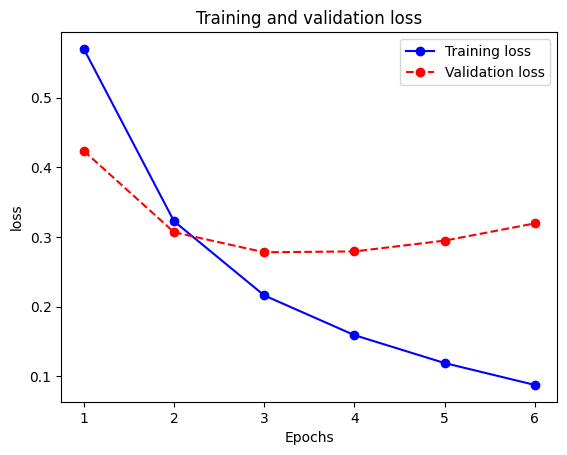

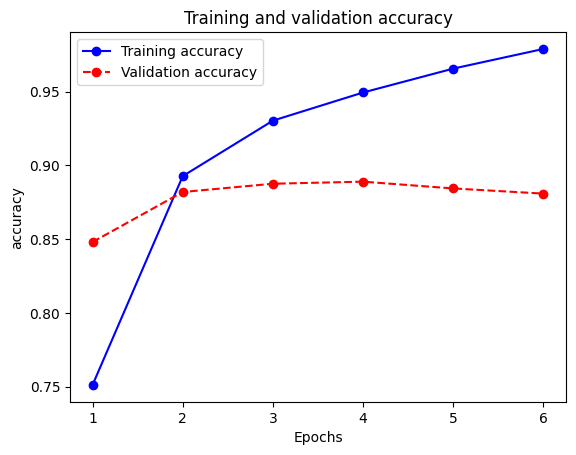

In [22]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

## 4.4. Weight Regularization

* A simpler network may give better results than a more complex network (which would over-fit the learning data).
* A simpler network may also mean having "simpler" weights.
* Here by "simple" we mean having less entropy, i.e., restricting the values of the weights to small numbers making their distribution more regular.
* This is known as **regularization of weights**.
* To achieve this, what is done is to add a cost to the error function associated with having large values in the weights. 
* There are two ways of doing this, the **L1** regularization and the **L2** regularization. 

### 4.4.1. L1 regularization (Lasso)

* The __L1__ regularization consists in adding a cost to this loss function associated to the absolute value of the network weights. 
* This cost is controlled by a parameter _lambda_ as shown below:

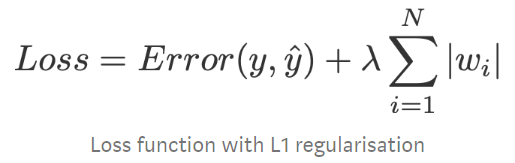

### 4.4.2. L1 regularization (Ridge)

* The __L2__ regularization consists of adding a cost to the loss function associated with the square of the network weights.

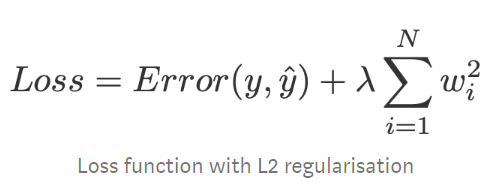

### 4.4.3. Weight regularization in Keras

* In Keras, weight regularizations are made by passing a regularizer parameter to the model.
* This is done when creating a layer using the `kernel_regularizer` parameter to which we pass an instance of a regularizer, which can be L1 or L2, with its corresponding _lambda_ value.
* Let's see the effect of adding such a regularizer to the IMDB network we have seen before.

In [23]:
from keras import regularizers

model = keras.Sequential(name='imdb')
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dense(1, name='output',  activation='sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6829 - loss: 0.9760 - val_accuracy: 0.8466 - val_loss: 0.6675
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8734 - loss: 0.6167 - val_accuracy: 0.8684 - val_loss: 0.5703
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8911 - loss: 0.5303 - val_accuracy: 0.8755 - val_loss: 0.5290
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9022 - loss: 0.4836 - val_accuracy: 0.8722 - val_loss: 0.5073
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9099 - loss: 0.4486 - val_accuracy: 0.8803 - val_loss: 0.4869
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9120 - loss: 0.4332 - val_accuracy: 0.8772 - val_loss: 0.4786
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9214 - loss: 0.4113 - val_accuracy: 0.8775 - val_loss: 0.4680
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9220 - loss: 0.3964 - val_accuracy: 0.8820 - val_loss

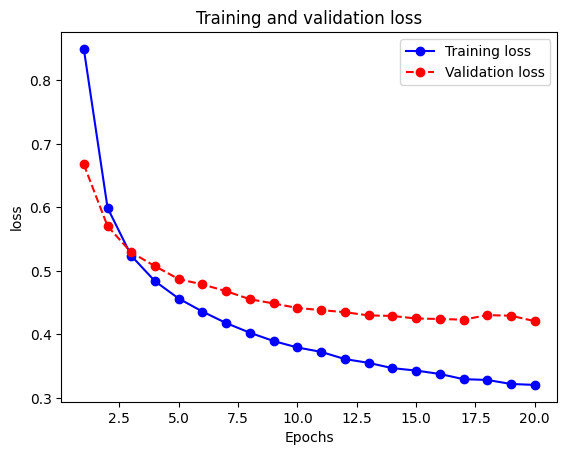

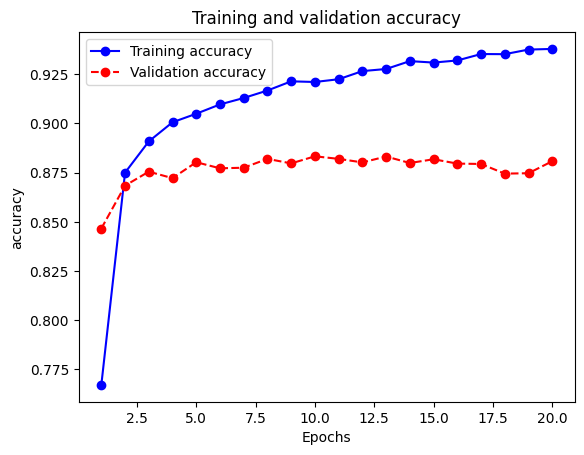

In [24]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

* We can see that although the two networks have the same number of parameters the overfitting is more contained in this second network. 
* Using regularizers we can also apply the L1 regularization in Keras or even both at the same time.

In [25]:
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Interpretation of weight regularization 

* L1 regularization is generally considered to generate models that are simple and interpretable, but not capable of learning complex patterns.
* On the other hand, L2 regularization gives rise to more complex models (no zero weights) but is more capable of learning complex patterns.
* Applying both at the same time, you can obtain an intermediate effect between the two.


## 4.5. Dropout

### 4.5.1. Definition

* Dropout is a technique where randomly selected neurons are ignored during training. They are "dropped out" randomly. 
* This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass, and any weight updates are not applied to the neuron on the backward pass.
* It was developed by Geoff Hinton and his students at the University of Toronto.
* In the following image, we can see an animation in which a 50% dropout has been added between the two hidden layers.

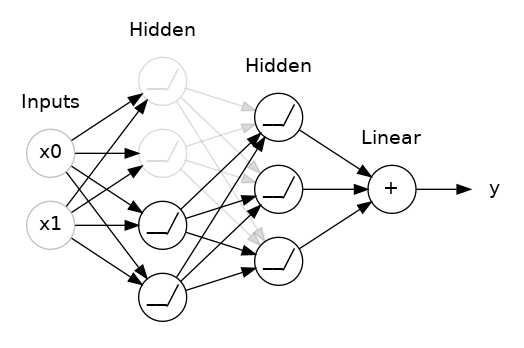

### 4.5.2. Dropout rationale

* The motivation for the *dropout* is to eliminate the co-adaptation between neurons that causes them to become highly specialized and lose the ability to generalize.
* The central idea of dropout is to approximate the ensemble learning as if we were to train many different models and average their predictions. 

### 4.5.3. Dropout en Keras

* In Keras the *dropout* is applied by adding `Dropout` layers between the normal (`Dense`) layers of the network.
* The following example shows the operation of the IMDB network to which two *dropout* layers have been added after each of the hidden layers.

In [26]:
model = keras.Sequential()
model.add(layers.Input(shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

history_dict = history.history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5435 - loss: 0.6853 - val_accuracy: 0.8129 - val_loss: 0.5869
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6993 - loss: 0.5834 - val_accuracy: 0.8603 - val_loss: 0.4508
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7918 - loss: 0.4684 - val_accuracy: 0.8768 - val_loss: 0.3484
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8471 - loss: 0.3789 - val_accuracy: 0.8881 - val_loss: 0.2952
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8831 - loss: 0.3160 - val_accuracy: 0.8895 - val_loss: 0.2766
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9072 - loss: 0.2666 - val_accuracy: 0.8889 - val_loss: 0.2735
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9239 - loss: 0.2303 - val_accuracy: 0.8891 - val_loss: 0.2742
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9350 - loss: 0.2035 - val_accuracy: 0.8894 - val_loss

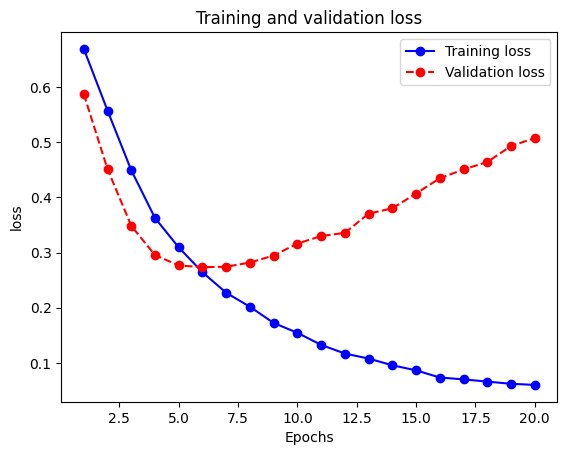

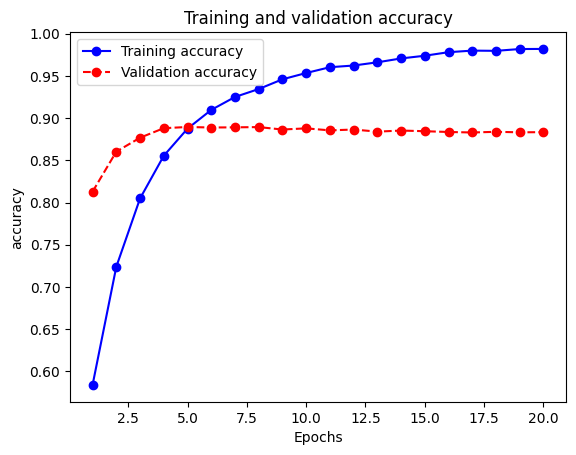

In [28]:
plot(history_dict['loss'], history_dict['val_loss'], 'loss')
plot(history_dict['accuracy'], history_dict['val_accuracy'], 'accuracy')

* We can see how the model takes longer to overfit and this overfit is smaller than if the *dropout* did not exist.

## 4.6. Data augmentation

* It consists of creating new synthetic cases from existing ones to increase the number of available training cases.
* We will leave it to see in CNNs, since it is easier to apply with images. 

## 4.7. German Credit Numeric example

* Vamos a aplicar las siguientes regularizaciones al ejemplo _German Credit_
  - _Early stopping_
  - Regularización de pesos
  - _Dropout_

### 4.7.1. Cargamos el conjunto de datos

In [29]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import numpy as np
import random

#Fijamos la semilla para poder reproducir los resultados
seed=1234
os.environ['PYTHONHASHSEED']=str(seed)
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [30]:
# Cargamos el conjunto de datos
ds_train = tfds.load('german_credit_numeric', split='train[:40%]',  as_supervised=True).batch(128)
ds_val = tfds.load('german_credit_numeric', split='train[40%:50%]', as_supervised=True).batch(128)
ds_test = tfds.load('german_credit_numeric', split='train[50%:]', as_supervised=True).batch(128)

In [31]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento 
fn_perdida = keras.losses.BinaryCrossentropy()
optimizador = keras.optimizers.Adam(0.001)
metrica = keras.metrics.AUC()

### 4.7.2. Creamos un modelo `Sequential`

In [32]:
tamano_entrada = 24
h0_size = 20
h1_size = 10
h2_size = 5

#TODO - define el modelo Sequential
model =  ...

#TODO - incluye la capa de entrada y las 3 capas del modelo Dense 
...

#Construimos el modelo y mostramos 
model.build()
print(model.summary())

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [33]:
#TODO - indicar los parametros del método compile
model.compile(loss=fn_perdida,
              optimizer=optimizador,
              metrics=[metrica])

In [34]:
#Establecemos el número de epochs
num_epochs =  700

# Guardamos los pesos antes de entrenar, para poder resetear el modelo posteriormente y hacer comparativas.
pesos_preentrenamiento = model.get_weights()

#TODO - entrenar el modelo
history = model.fit(...)

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - auc: 0.4176 - loss: 2.7028 - val_auc: 0.2993 - val_loss: 2.7839
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4010 - loss: 2.0907 - val_auc: 0.2821 - val_loss: 2.1012
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.3974 - loss: 1.5810 - val_auc: 0.3131 - val_loss: 1.5344
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3909 - loss: 1.1896 - val_auc: 0.3129 - val_loss: 1.1670
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3955 - loss: 0.9278 - val_auc: 0.3262 - val_loss: 0.9265
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3976 - loss: 0.7888 - val_auc: 0.3350 - val_loss: 0.8392
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3979 - loss: 0.7302 - val_auc: 0.3431 - val_loss: 0.7870
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4073 - loss: 0.6957 - val_auc: 0.3757 - val_loss: 0.7494
Epoch 9/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4326 - loss: 0.6797 -

In [35]:
# Nueva versión que imprime la gráfica sin puntos
# Si son muchos (700) una recta se ve de forma más clara
def plot_no_dots(train, validation, title):
    plt.clf()
    epochs = range(1, len(train) + 1)
    
    plt.plot(epochs, train, 'b-', label='Training ' + title)
    plt.plot(epochs, validation, 'r--', label='Validation '+ title) 

    plt.title('Training and validation ' + title)
    plt.xlabel('Epochs')
    plt.ylabel(title)
    plt.legend()
    plt.show()

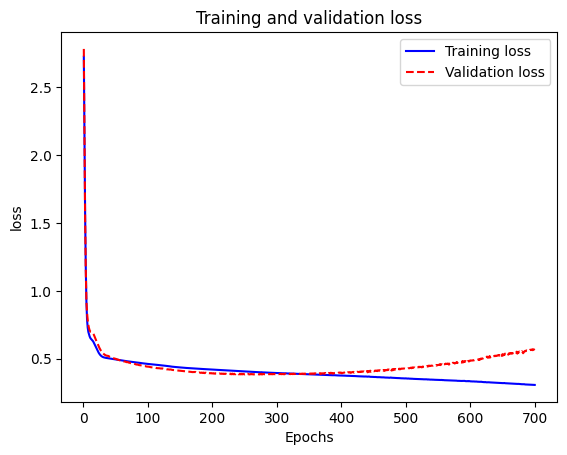

In [36]:
plot_no_dots(history.history['loss'], history.history['val_loss'], 'loss')

In [37]:
#TODO - llamar a evaluate, guardando el resultado
result = model.evaluate(...) 
print(model.metrics_names)
print(result)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - auc: 0.7417 - loss: 0.7415 
['loss', 'compile_metrics']
[0.8507982492446899, 0.7220396399497986]


### 4.7.3. Usamos _Early Stopping_

In [38]:
# simple early stopping
#TODO- indica la medida a monitorizar,  el modo y la paciencia
es = EarlyStopping(
    monitor=...
    mode=...
    patience=...
)

# Antes de entrenar, olvidamos el entrenamiento anterior restaurando los pesos iniciales
model.set_weights(pesos_preentrenamiento)

#TODO- indica el porcentaje de muestras que se usarán para validación
history = model.fit(..., callbacks=[es])

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4156 - loss: 2.6239 - val_auc: 0.2888 - val_loss: 1.7760
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4034 - loss: 1.1984 - val_auc: 0.3093 - val_loss: 0.8472
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3880 - loss: 0.7436 - val_auc: 0.2938 - val_loss: 0.8000
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.3581 - loss: 0.7628 - val_auc: 0.3760 - val_loss: 0.7587
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.3832 - loss: 0.7396 - val_auc: 0.4110 - val_loss: 0.7165
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.4743 - loss: 0.7055 - val_auc: 0.4590 - val_loss: 0.6968
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5249 - loss: 0.6866 - val_auc: 0.5445 - val_loss: 0.6912
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.5603 - loss: 0.6779 - val_auc: 0.5555 - val_loss: 0.6870
Epoch 9/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - auc: 0.5697 - loss: 0.6760 

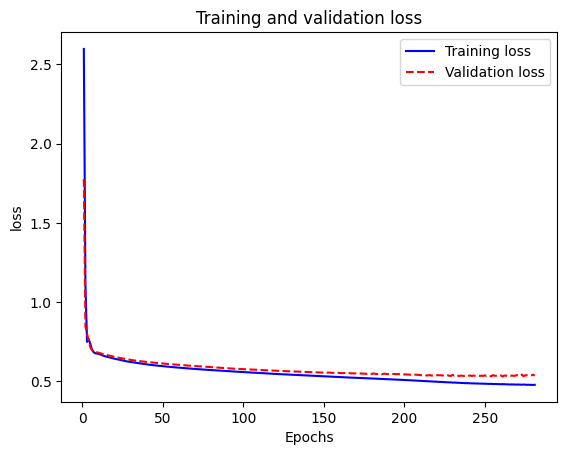

In [39]:
plot_no_dots(history.history['loss'], history.history['val_loss'], 'loss')

In [40]:
#TODO - llamar a evaluate
result = model.evaluate(...) 
print(model.metrics_names)
print(result)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - auc: 0.6423 - loss: 0.5568 
['loss', 'compile_metrics']
[0.5845562815666199, 0.6141427159309387]


### 4.7.4. Usamos regularización de pesos

In [41]:
#Descomentar el término regularizador que se vaya a emplear
from tensorflow.keras.regularizers import l2
#from tensorflow.keras.regularizers import l1

tamano_entrada = 24
#TODO- Varía el valor de alpha para ajustar la regularización
alpha=0.01
h0_size = 20
h1_size = 10
h2_size = 5
#TODO - define el modelo Sequential
model =  ...
#TODO - incluye la capa de entrada
model.add(...)
#TODO - incluye las unidades de la primera capa Dense
model.add(layers.Dense(units=..., kernel_regularizer=l2(alpha),activation='relu'))
#TODO - incluye el regularizador en las distintas capas
model.add(...)
model.add(...)
model.add(...)
#Construimos el modelo y mostramos 
model.build()
print(model.summary())

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [42]:
fn_perdida = keras.losses.BinaryCrossentropy()
optimizador = keras.optimizers.Adam(0.001)
metrica = keras.metrics.AUC()

In [43]:
#TODO - indicar los parametros del método compile
model.compile(...)

In [44]:
num_epochs =  700
#TODO - entrenar el modelo
history = model.fit(...)

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - auc_1: 0.4314 - loss: 1.8734 - val_auc_1: 0.3236 - val_loss: 2.0071
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_1: 0.4296 - loss: 1.6884 - val_auc_1: 0.3262 - val_loss: 1.8098
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_1: 0.4323 - loss: 1.5246 - val_auc_1: 0.3355 - val_loss: 1.6274
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_1: 0.4424 - loss: 1.3740 - val_auc_1: 0.3517 - val_loss: 1.4583
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_1: 0.4509 - loss: 1.2418 - val_auc_1: 0.3798 - val_loss: 1.3060
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_1: 0.4750 - loss: 1.1263 - val_auc_1: 0.4079 - val_loss: 1.1659
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_1: 0.5319 - loss: 1.0332 - val_auc_1: 0.4929 - val_loss: 1.0774
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_1: 0.5723 - loss: 0.9924 - val_auc_1: 0.5645 - val_loss: 1.0421
Epoch 9/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/ste

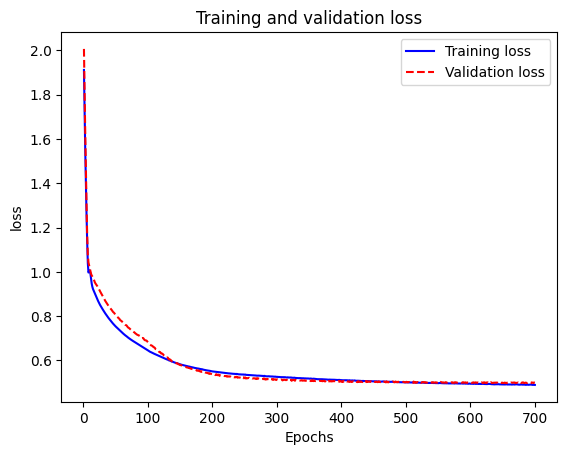

In [45]:
plot_no_dots(history.history['loss'], history.history['val_loss'], 'loss')

In [46]:
#TODO - llamar a evaluate
result = model.evaluate(...) 
print(model.metrics_names)
print(result)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_1: 0.7743 - loss: 0.6286
['loss', 'compile_metrics']
[0.6640689373016357, 0.7555609941482544]


### 4.7.5. Usamos _Dropout_

In [47]:
#Indicamos la función de perdida, el algoritmo de optimización y la métrica para evaluar el rendimiento 
fn_perdida = keras.losses.BinaryCrossentropy()
optimizador = keras.optimizers.Adam(0.001)
metrica = keras.metrics.AUC()

In [48]:
tamano_entrada = 24
h0_size = 20
h1_size = 10
h2_size = 5

#TODO - define el modelo Sequential
model =  ...

#TODO - incluye la capa de entrada y las 3 capas Dense al modelo 
model.add(...)
model.add(layers.Dropout(0.2))

#TODO - incluir el resto de capas Dense y Dropout
model.add(...)
model.add(...)
model.add(...)
model.add(...)
model.add(...)
model.add(...)
model.add(...)

#Construimos el modelo y mostramos 
model.build()
print(model.summary())

Model: "Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 771 (3.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [49]:
#TODO - indicar los parametros del método compile
model.compile(...)

In [50]:
num_epochs =  700
#TODO - entrenar el modelo
history = model.fit(...)

Epoch 1/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - auc_2: 0.5000 - loss: 2.4984 - val_auc_2: 0.4610 - val_loss: 1.7226
Epoch 2/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_2: 0.5446 - loss: 1.8388 - val_auc_2: 0.4774 - val_loss: 1.3914
Epoch 3/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc_2: 0.5202 - loss: 1.7567 - val_auc_2: 0.5231 - val_loss: 1.0831
Epoch 4/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_2: 0.4874 - loss: 1.4398 - val_auc_2: 0.5488 - val_loss: 0.8627
Epoch 5/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_2: 0.4722 - loss: 1.3611 - val_auc_2: 0.5650 - val_loss: 0.7320
Epoch 6/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_2: 0.5515 - loss: 1.0492 - val_auc_2: 0.5745 - val_loss: 0.6656
Epoch 7/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_2: 0.5220 - loss: 1.1856 - val_auc_2: 0.5719 - val_loss: 0.6477
Epoch 8/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc_2: 0.5039 - loss: 0.9887 - val_auc_2: 0.5495 - val_loss: 0.6453
Epoch 9/700
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

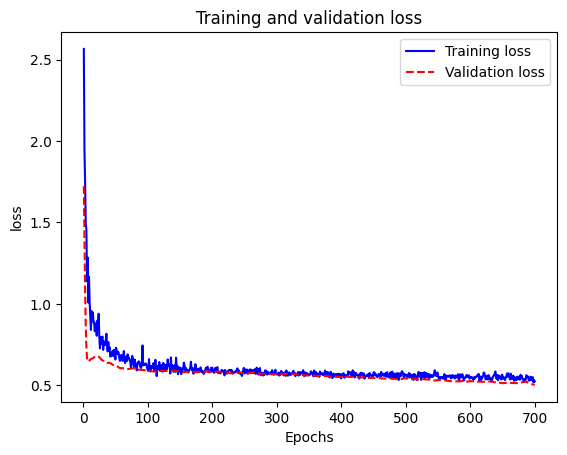

In [51]:
plot_no_dots(history.history['loss'], history.history['val_loss'], 'loss')

In [52]:
#TODO - llamar a evaluate
result = model.evaluate(...) 
print(model.metrics_names)
print(result)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - auc_2: 0.7207 - loss: 0.5688
['loss', 'compile_metrics']
[0.5882789492607117, 0.7120041847229004]
